# Assignment 4 of Homework 5

In [123]:
# As per coding convention, all imported packages will be presented in the first line

# For python 2 and 3 compatibility
from __future__ import print_function

#importing packages
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats
from scipy import stats
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [39]:
# setting puidata, despite my bash being set up correctly 
os.environ["PUIDATA"] = "%s/001_PUI/PUIDATA"%os.getenv("HOME")
print("Path to PUIDATA", os.getenv("PUIDATA"))

Path to PUIDATA /nfshome/qg412/001_PUI/PUIDATA


# Downloading the data

In [40]:
# code credit: Prof bianco
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### checking if it is already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("wget https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it, use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [41]:
#jan cause it was snowing: for seasonality
datestring = '201601'
getCitiBikeCSV(datestring)

file in place, you can continue


In [42]:
jan16 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
jan16.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [43]:
# july cause its summer: for seasonality
datestring = '201607'
getCitiBikeCSV(datestring)

file in place, you can continue


In [44]:
jul16 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
jul16.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0
4,609,7/1/2016 00:00:31,7/1/2016 00:10:40,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,212,W 16 St & The High Line,40.743349,-74.006818,15514,Customer,NaN,0


# Initial data cleaning

In [45]:
# convering things to a preferred date time format
jan16['date'] = pd.to_datetime(jan16['starttime'])
jul16['date'] = pd.to_datetime(jul16['starttime'])
jul16.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0,2016-07-01 00:00:02
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1,2016-07-01 00:00:18
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2,2016-07-01 00:00:19
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0,2016-07-01 00:00:24
4,609,7/1/2016 00:00:31,7/1/2016 00:10:40,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,212,W 16 St & The High Line,40.743349,-74.006818,15514,Customer,NaN,0,2016-07-01 00:00:31


# Trip Duration for Bikers during Day vs Night

$H_0$: There is no difference between the trip duration of bikers that ride during the day vs night.

At a significance of p=0.05

Where in Janurary, 
- day is defined as any trips' starttime taken between 7am to 5pm 

- night is defined as any trips' starttime taken between 5pm to 7am

While in July,
- day is defined as any trips' starttime taken between 6am to 8pm 

- night is defined as any trips' starttime taken between 8pm to 6am

Source for daylight hours in new york @ https://www.timeanddate.com/sun/usa/new-york

In [46]:
#dropping stuffs that was accidentally created wrongly
#jan16.drop('timestamp_only', axis=1, inplace=True)
#jan16.head()

#jul16.sort_values('tripduration')

### Data Wrangling

In [47]:
# creating a new column of data that contains only the time.
# code credit @ https://stackoverflow.com/questions/35595710/splitting-timestamp-column-into-seperate-date-and-time-columns
jan16['new_time'] = [d.time() for d in jan16['date']]
jul16['new_time'] = [d.time() for d in jul16['date']]
jul16.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,new_time
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0,2016-07-01 00:00:02,00:00:02
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1,2016-07-01 00:00:18,00:00:18
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2,2016-07-01 00:00:19,00:00:19
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0,2016-07-01 00:00:24,00:00:24
4,609,7/1/2016 00:00:31,7/1/2016 00:10:40,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,212,W 16 St & The High Line,40.743349,-74.006818,15514,Customer,NaN,0,2016-07-01 00:00:31,00:00:31


In [48]:
# code credits @ https://stackoverflow.com/questions/41993598/how-to-add-a-column-to-pandas-dataframe-based-on-time-from-another-column 
# extracting day (7am to 5pm) and night (5pm to 7am) riders in Jan 16
# to check that it changes to day at 7am, do head(1400)
# to check that i changes to night from 5pm onwards, do head(8030)
hours = jan16.date.dt.hour.values
jan16['TimeOfDay'] = np.where(hours <= 6, 'Night',
                     np.where(hours >= 17, 'Night', 'Day'))
jan16['Night'] = np.where(hours <= 6, '1',
                 np.where(hours >= 17, '1', '0'))
jan16['Day'] = np.where(hours <= 6, '0',
               np.where(hours >= 17, '0', '1'))
jan16.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,new_time,TimeOfDay,Night,Day
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41,00:00:41,Night,1,0
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45,00:00:45,Night,1,0
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48,00:00:48,Night,1,0
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06,00:01:06,Night,1,0
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12,00:01:12,Night,1,0


In [49]:
# summarize how many day and night riders
jan16.TimeOfDay.value_counts()

Day      306896
Night    202582
Name: TimeOfDay, dtype: int64

In [50]:
jan16.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date', 'new_time', 'TimeOfDay', 'Night',
       'Day'],
      dtype='object')

In [52]:
jan16_clean = jan16[['tripduration','date','new_time','TimeOfDay','Night','Day']]
jan16_clean.head()

,tripduration,date,new_time,TimeOfDay,Night,Day
0,923,2016-01-01 00:00:41,00:00:41,Night,1,0
1,379,2016-01-01 00:00:45,00:00:45,Night,1,0
2,589,2016-01-01 00:00:48,00:00:48,Night,1,0
3,889,2016-01-01 00:01:06,00:01:06,Night,1,0
4,1480,2016-01-01 00:01:12,00:01:12,Night,1,0


In [53]:
#getting the data types for each column
jan16_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509478 entries, 0 to 509477
Data columns (total 6 columns):
tripduration    509478 non-null int64
date            509478 non-null datetime64[ns]
new_time        509478 non-null object
TimeOfDay       509478 non-null object
Night           509478 non-null object
Day             509478 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 23.3+ MB


In [54]:
# converting the data types of Day and Night columns to integers
jan16_clean[['Day', 'Night']] = jan16_clean[['Day', 'Night']].astype(int)
jan16_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509478 entries, 0 to 509477
Data columns (total 6 columns):
tripduration    509478 non-null int64
date            509478 non-null datetime64[ns]
new_time        509478 non-null object
TimeOfDay       509478 non-null object
Night           509478 non-null int64
Day             509478 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 23.3+ MB


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [55]:
#print the descriptive statistics to get bird eye view of the data
jan16_clean.describe(include='all') 

,tripduration,date,new_time,TimeOfDay,Night,Day
count,5.094780e+05,509478,509478,509478,509478.000000,509478.000000
unique,NaN,420479,73018,2,NaN,NaN
top,NaN,2016-01-12 18:56:25,08:43:13,Day,NaN,NaN
freq,NaN,7,30,306896,NaN,NaN
first,NaN,2016-01-01 00:00:41,NaN,NaN,NaN,NaN
last,NaN,2016-01-31 23:59:26,NaN,NaN,NaN,NaN
mean,8.472119e+02,NaN,NaN,NaN,0.397627,0.602373
std,7.396954e+03,NaN,NaN,NaN,0.489408,0.489408
min,6.100000e+01,NaN,NaN,NaN,0.000000,0.000000
25%,3.310000e+02,NaN,NaN,NaN,0.000000,0.000000


In [56]:
# extracting day (6am to 8pm) and night riders in Jul 16
# to check that it changes to day at 6am, do head(1530)
# to check that it changes to night from 8pm onwards, do head(106150)
hours = jul16.date.dt.hour.values
jul16['TimeOfDay'] = np.where(hours <= 5, 'Night', 
                     np.where(hours >= 20, 'Night', 'Day'))
jul16['Night'] = np.where(hours <= 5, '1',
                 np.where(hours >= 20, '1', '0'))
jul16['Day'] = np.where(hours <= 5, '0',
               np.where(hours >= 20, '0', '1'))
jul16.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,new_time,TimeOfDay,Night,Day
0,704,7/1/2016 00:00:02,7/1/2016 00:11:47,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,17431,Customer,NaN,0,2016-07-01 00:00:02,00:00:02,Night,1,0
1,492,7/1/2016 00:00:18,7/1/2016 00:08:31,293,Lafayette St & E 8 St,40.730287,-73.990765,466,W 25 St & 6 Ave,40.743954,-73.991449,24159,Subscriber,1984.0,1,2016-07-01 00:00:18,00:00:18,Night,1,0
2,191,7/1/2016 00:00:19,7/1/2016 00:03:31,3090,N 8 St & Driggs Ave,40.717746,-73.956001,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,16345,Subscriber,1986.0,2,2016-07-01 00:00:19,00:00:19,Night,1,0
3,687,7/1/2016 00:00:24,7/1/2016 00:11:52,459,W 20 St & 11 Ave,40.746745,-74.007756,347,Greenwich St & W Houston St,40.728846,-74.008591,25210,Customer,NaN,0,2016-07-01 00:00:24,00:00:24,Night,1,0
4,609,7/1/2016 00:00:31,7/1/2016 00:10:40,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,212,W 16 St & The High Line,40.743349,-74.006818,15514,Customer,NaN,0,2016-07-01 00:00:31,00:00:31,Night,1,0


In [57]:
# summarize how many day and night riders
jul16.TimeOfDay.value_counts()

Day      1161845
Night     218265
Name: TimeOfDay, dtype: int64

In [58]:
jul16_clean = jul16[['tripduration','date','new_time','TimeOfDay','Night','Day']]
jul16_clean.head()

,tripduration,date,new_time,TimeOfDay,Night,Day
0,704,2016-07-01 00:00:02,00:00:02,Night,1,0
1,492,2016-07-01 00:00:18,00:00:18,Night,1,0
2,191,2016-07-01 00:00:19,00:00:19,Night,1,0
3,687,2016-07-01 00:00:24,00:00:24,Night,1,0
4,609,2016-07-01 00:00:31,00:00:31,Night,1,0


In [59]:
#print the descriptive statistics to get bird eye view of the data
jul16_clean.describe(include='all')

,tripduration,date,new_time,TimeOfDay,Night,Day
count,1.380110e+06,1380110,1380110,1380110,1380110,1380110
unique,NaN,944935,81087,2,2,2
top,NaN,2016-07-11 17:54:14,18:10:58,Day,0,1
freq,NaN,9,61,1161845,1161845,1161845
first,NaN,2016-07-01 00:00:02,NaN,NaN,NaN,NaN
last,NaN,2016-07-31 23:59:59,NaN,NaN,NaN,NaN
mean,1.000328e+03,NaN,NaN,NaN,NaN,NaN
std,1.373462e+04,NaN,NaN,NaN,NaN,NaN
min,6.100000e+01,NaN,NaN,NaN,NaN,NaN
25%,4.030000e+02,NaN,NaN,NaN,NaN,NaN


In [60]:
# converting day and night column from object to integer
jul16_clean[['Day', 'Night']] = jul16_clean[['Day', 'Night']].astype(int)
jul16_clean.info()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380110 entries, 0 to 1380109
Data columns (total 6 columns):
tripduration    1380110 non-null int64
date            1380110 non-null datetime64[ns]
new_time        1380110 non-null object
TimeOfDay       1380110 non-null object
Night           1380110 non-null int64
Day             1380110 non-null int64
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 63.2+ MB


In [62]:
# Creating a night only dataset for jan to be added to july's later
night_jan = jan16_clean[jan16_clean['Night'] > 0]
night_jan.drop(['Day'],axis=1, inplace=True)
night_jan.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,tripduration,date,new_time,TimeOfDay,Night
0,923,2016-01-01 00:00:41,00:00:41,Night,1
1,379,2016-01-01 00:00:45,00:00:45,Night,1
2,589,2016-01-01 00:00:48,00:00:48,Night,1
3,889,2016-01-01 00:01:06,00:01:06,Night,1
4,1480,2016-01-01 00:01:12,00:01:12,Night,1


In [63]:
# Creating a day only dataset for jan to be added to july's later
day_jan = jan16_clean[jan16_clean['Day'] > 0]
day_jan.drop(['Night'],axis=1, inplace=True)
day_jan.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,tripduration,date,new_time,TimeOfDay,Day
1397,1437,2016-01-01 07:00:05,07:00:05,Day,1
1398,628,2016-01-01 07:00:28,07:00:28,Day,1
1399,539,2016-01-01 07:01:41,07:01:41,Day,1
1400,286,2016-01-01 07:03:28,07:03:28,Day,1
1401,578,2016-01-01 07:03:56,07:03:56,Day,1


In [64]:
# Creating a night only dataset for jan to be added to july's later
night_jul = jul16_clean[jul16_clean['Night'] > 0]
night_jul.drop(['Day'],axis=1, inplace=True)
night_jul.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,tripduration,date,new_time,TimeOfDay,Night
0,704,2016-07-01 00:00:02,00:00:02,Night,1
1,492,2016-07-01 00:00:18,00:00:18,Night,1
2,191,2016-07-01 00:00:19,00:00:19,Night,1
3,687,2016-07-01 00:00:24,00:00:24,Night,1
4,609,2016-07-01 00:00:31,00:00:31,Night,1


In [65]:
# Creating a day only dataset for jan to be added to july's later
day_jul = jul16_clean[jul16_clean['Day'] > 0]
day_jul.drop(['Night'],axis=1, inplace=True)
day_jul.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,tripduration,date,new_time,TimeOfDay,Day
1511,177,2016-07-01 06:00:02,06:00:02,Day,1
1512,1653,2016-07-01 06:00:07,06:00:07,Day,1
1513,686,2016-07-01 06:00:06,06:00:06,Day,1
1514,450,2016-07-01 06:00:14,06:00:14,Day,1
1515,265,2016-07-01 06:00:29,06:00:29,Day,1


In [66]:
#combined night dataset
night_all = night_jan.append(night_jul)
night_all.shape

(420847, 5)

In [67]:
#combined day dataset
day_all = day_jan.append(day_jul)
day_all.shape

(1468741, 5)

In [68]:
#further cleaning
day_all_trip = day_all[['tripduration']]
day_all_trip.head()

,tripduration
1397,1437
1398,628
1399,539
1400,286
1401,578


In [69]:
#further cleaning 
night_all_trip = night_all[['tripduration']]
night_all_trip.head()

,tripduration
0,923
1,379
2,589
3,889
4,1480


# Extra Credit 1 : Plotting histograms 

In [118]:
#trying to understand the data column trip duration
day_all_trip['tripduration'].describe()

count    1.468741e+06
mean     9.616511e+02
std      1.204425e+04
min      6.100000e+01
25%      3.860000e+02
50%      6.380000e+02
75%      1.087000e+03
max      6.707533e+06
Name: tripduration, dtype: float64

In [119]:
#trying to understand the data column trip duration
night_all_trip['tripduration'].describe()

count    4.208470e+05
mean     9.499459e+02
std      1.336448e+04
min      6.100000e+01
25%      3.570000e+02
50%      5.810000e+02
75%      9.710000e+02
max      5.700729e+06
Name: tripduration, dtype: float64

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


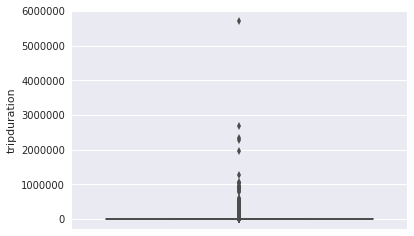

In [124]:
# plotting a box plot to see the distribution of the data
night = sns.boxplot(y = night_all_trip['tripduration'])

It is evident that there are some really big values that is skewing the entire dataset that even the box plot is not rendering. There is therefore a need to remove some of this very large trip duration that is over a day long, which logically speaking, is not possible to cycle for that long continuously. 

For the purposes of plotting the histogram later, the sample sizes shall be drastically reduced to 10800 seconds which translates into 3 hours of continous riding, which is more probable logically as well as making the whole sample small enough to de displayed in histogram. 

Text(0.5,1,'Tripduration distribution of dayriders')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


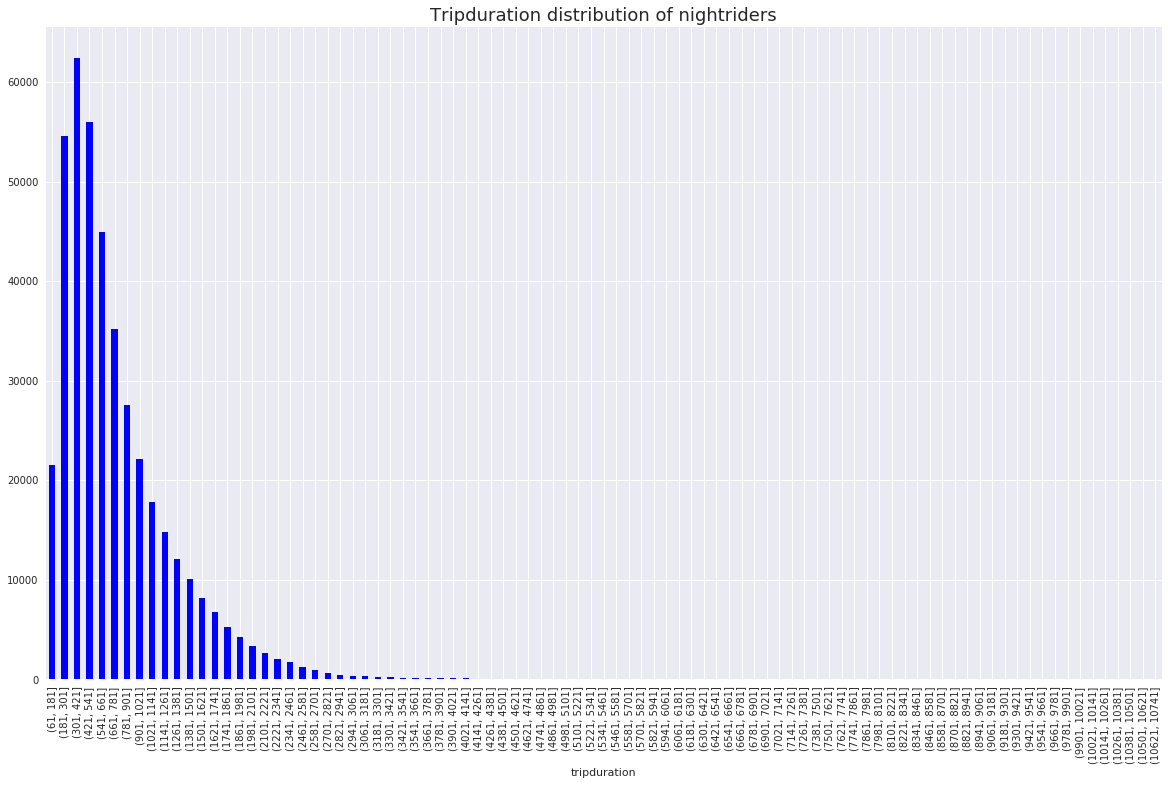

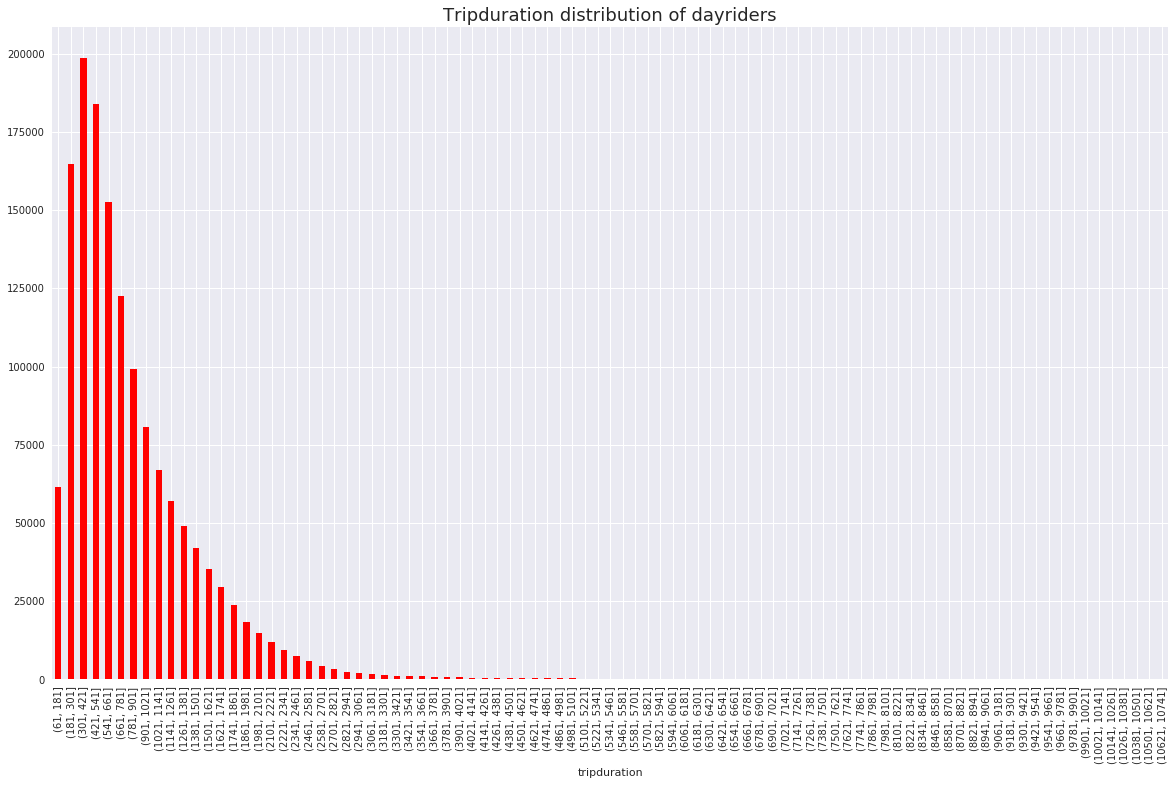

In [125]:
# Plotting histogram. 

bins = np.arange(61,10800,120)
axNight = night_all_trip['tripduration'].groupby(pd.cut(night_all_trip['tripduration'],bins)).agg([count_nonzero]).plot(kind='bar',legend=False,figsize=(20,12),color='blue')
axNight.set_title('Tripduration distribution of nightriders',size='18')

axDay = day_all_trip['tripduration'].groupby(pd.cut(day_all_trip['tripduration'],bins)).agg([count_nonzero]).plot(kind='bar',legend=False,color='red',figsize=(20,12))
axDay.set_title('Tripduration distribution of dayriders',size='18')

### Creating the cumulative distribution plot

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


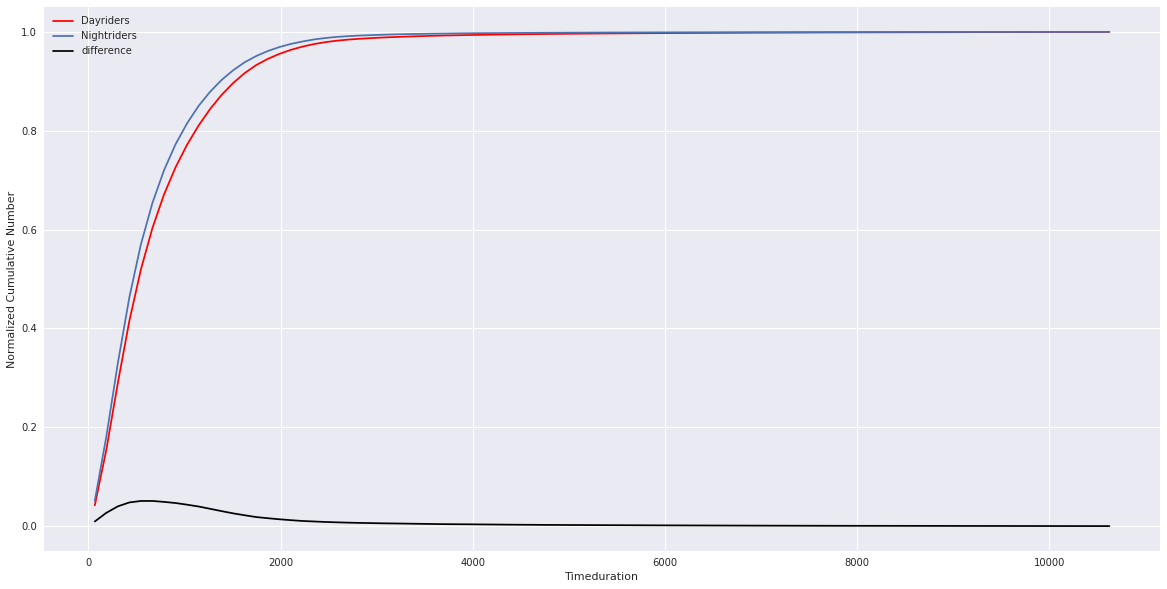

In [126]:
# need to normalize data first

csDayriders = day_all_trip.tripduration.groupby(pd.cut(day_all_trip.tripduration,bins)).agg([count_nonzero]).cumsum()

csNightriders = night_all_trip.tripduration.groupby(pd.cut(night_all_trip.tripduration,bins)).agg([count_nonzero]).cumsum()


#print(np.abs(csDayriders /csDayriders.max() - csNightriders /csNightriders.max()))
pl.figure(figsize=(20,10))
pl.plot(bins[:-1]+5 ,csDayriders/csDayriders.max(),label='Dayriders',color='r',)
pl.plot(bins[:-1]+5 , csNightriders/csNightriders.max(),label='Nightriders')
pl.plot(bins[:-1]+5, np.abs(csDayriders /csDayriders.max() - csNightriders /csNightriders.max()), 'k',
        label = "difference")

pl.xlabel("Timeduration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

Figure: Cumulative distribution of Citibike riders by Day and Night. There seems to be similar tripduration for day and night, with little difference between the too. 

# Kolmogorov-Smirnov Statistic (KS Test)

A two-sided test for the null hypothesis that 2 independent samples are drawn from the same continuous distribution. If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

**Null Hypothesis**: The samples of nights' trip duration is the same as the days' trip duration, at a significance level of p=0.05.

In [70]:
# seed for reproducibility
np.random.seed(13)
n1 = 420847 # size of overall night sample
n2 = 1468741 # size of overall day sample

In [71]:
#code credit:https://stackoverflow.com/questions/11739796/turn-2d-numpy-array-into-1d-array-for-plotting-a-histogram
#converting to array 
nights2D = np.array(night_all_trip) # it will be a 2d array here
nights1D = np.squeeze(nights2D) # making it into a 1d array
days2D = np.array(day_all_trip)
days1D = np.squeeze(days2D) # making it into a 1d array
days1D

array([1437,  628,  539, ..., 3616,  406, 1276])

In [72]:
# for non-reducted dataset
stats.ks_2samp(nights1D, days1D)

Ks_2sampResult(statistic=0.051107865398419494, pvalue=0.0)

For non-reducted dataset, the KS test returned as 0.0511 and a low p-value of 0.00. The low p-value means that the null hypothesis that the two samples have the same distribution can be rejected, implying that the night trip duration have a different distribution as the day trip duration, at a significance level of p=0.05.

# Pearson's Test for Correlation

Requires that each dataset be normally distributed. Measures the linear relationship between two datasets. Correlation varies between -1 and +1 with 0 implying no correlation.

The p-value returned from this test roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The reliablity of p-value increases with sample size, better when sample size are larger than 500.

Samples must be sorted and of the same size! 

**Null Hypothesis**: There is no correlation between the day trip duration and night trip duration at the same start stations, at a significance level of p=0.05. 


### Repeated Data Wrangling to get overall Day & Night w all columns
Note: I am sorry this is so messy, its actually repeated work from the front :(

In [80]:
#changing day and night to integer
jul16[['Day', 'Night']] = jul16[['Day', 'Night']].astype(int)

#getting only day
day_jul_allcolumn = jul16[jul16['Day'] > 0]
day_jul_allcolumn.drop(['Night'],axis=1, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [79]:
#changing day and night to integer
jan16[['Day', 'Night']] = jan16[['Day', 'Night']].astype(int)

#getting only day
day_jan_allcolumn = jan16[jan16['Day'] > 0]
day_jan_allcolumn.drop(['Night'],axis=1, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [83]:
#getting an ALL ENCOMPASSING DAY dataset for JAN & JUL
day_all_v2 = day_jan_allcolumn.append(day_jul_allcolumn)
day_all_v2.shape

(1468741, 19)

In [84]:
#repeating everything to get an ALL ENCoMPASSING NIGHT dataset for JAN & JUL
night_jan_allcolumn = jan16[jan16['Night'] > 0]
night_jan_allcolumn.drop(['Day'],axis=1, inplace=True)
night_jul_allcolumn = jul16[jul16['Night'] > 0]
night_jul_allcolumn.drop(['Day'],axis=1, inplace=True)

night_all_v2 = night_jan_allcolumn.append(night_jul_allcolumn)
night_all_v2.shape

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(420847, 19)

### Data Wrangling to get new dataframe with only mean trip duration day and night with station IDs for Pearson Test

The two pairwise data column I have chosen is mean trip duration for each start station id, for day and night, to test if they are correlated or not

In [89]:
# creating a new dataframe that records the station id and mean trip duration

day_station_mean = pd.DataFrame(day_all_v2.groupby(['start station id'])['tripduration'].mean())
night_station_mean = pd.DataFrame(night_all_v2.groupby(['start station id'])['tripduration'].mean())

night_station_mean.head()

,tripduration
start station id,
72,1326.629717
79,1099.384442
82,916.989446
83,927.126263
116,664.876866


In [90]:
# noticed that the tripduration column is not very well named
# i want to change them to be "night trip duration" and "day trip duration" respectively

day_station_mean.rename(columns={'tripduration' :'meanDayTripDuration'},inplace=True)
night_station_mean.rename(columns={'tripduration' :'meanNightTripDuration'},inplace=True)

night_station_mean.head()

,meanNightTripDuration
start station id,
72,1326.629717
79,1099.384442
82,916.989446
83,927.126263
116,664.876866


In [92]:
# Combining into one dataset! 
station_overall_mean = pd.concat([day_station_mean, night_station_mean], axis=1, join='inner')
station_overall_mean.head()

,meanDayTripDuration,meanNightTripDuration
start station id,,
72,1136.373373,1326.629717
79,1014.557966,1099.384442
82,1053.581937,916.989446
83,1107.984871,927.126263
116,684.670278,664.876866


In [115]:
scipy.stats.pearsonr(station_overall_mean.meanDayTripDuration,station_overall_mean.meanNightTripDuration)

(0.058340445369541451, 0.19640472519647467)

The test returns the pearson correlation coefficient of 0.0583 and a 2 tailed p-value of 0.196. 

This translates into the fact that the null hypothesis cannot be rejected and therefore, there is no correlation between the day trip duration and night trip duration at the same start stations, at a significance level of p=0.05.

# Spearman's Test for Correlation

This test for correlation does not assume that both datasets are normally distributed. 

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.

**Null Hypothesis**: There is no correlation between the day trip duration and night trip duration at the same start stations, at a significance level of p=0.05.

In [116]:
 scipy.stats.spearmanr(station_overall_mean.meanDayTripDuration, station_overall_mean.meanNightTripDuration)

SpearmanrResult(correlation=0.41941560668090538, pvalue=2.2069523196496799e-22)

The test returns the spearman correlation coefficient of 0.419 and a 2 tailed p-value that is much smaller than the initial significance value of 0.05. 

There is therefore enough evidence to reject null hypothesis that there is no correlation between the day trip duration and night trip duration at the same start stations, at a significance level of p=0.05. The correlation is pretty positive at 0.419. 

This also implies that for this particular set of data, it is not normally distributed as the pearson test failed but not Spearman's.

# Extra Credit 2: Age of Bikers in Manhatten & Brooklyn

In [130]:
year_2016 = pd.concat([night_all_v2,day_all_v2],axis=0)

In [131]:
brooklyn = year_2016[['birth year', 'end station id']][(year_2016['start station latitude'] >=  40.570066) & 
                                   (year_2016['start station latitude'] <  40.698649) & 
                                   (year_2016['start station longitude'] >= -74.036647 )  & 
                                   (year_2016['start station longitude'] <= -73.924627)]

manhattan = year_2016[['birth year', 'end station id']][(year_2016['start station latitude'] >=  40.698649) & 
                                    (year_2016['start station latitude'] <=  40.861564) & 
                                    (year_2016['start station longitude'] >= -74.006837 ) & 
                                    (year_2016['start station longitude'] <= -73.992114)]


In [132]:
manhattan['birth year'] = 2016 - manhattan['birth year']
manhattan.rename(columns={'birth year' : 'age'} ,inplace=True)
manhattan.dropna(inplace=True)
manhattan.size

942226

In [133]:
brooklyn['birth year'] = 2016 - brooklyn['birth year']
brooklyn.rename(columns={'birth year' : 'age'} ,inplace=True)
brooklyn.dropna(inplace=True)
brooklyn.size

174950

# KS Test

**Null Hypothesis**: There is no correlation between ages of riders of manhattan and brooklyn having the same end station id, at a significance level of p =0.05

In [134]:
scipy.stats.ks_2samp(brooklyn.age,manhattan.age)

Ks_2sampResult(statistic=0.094285585135546746, pvalue=0.0)

There is enough evidence to reject null hypothesis- There is slight positive correlation between ages of riders of manhatten and brooklyn at the same station id as the p value of 0.0 is less than 0.05. 

# Pearson

**Null Hypothesis**: There is no correlation between ages of riders of manhattan and brooklyn having the same end station id, at a significance level of p=0.05

In [136]:
brooklyn_endstations_mean = pd.DataFrame(brooklyn.groupby(['end station id'])['age'].mean())
manhattan_endstations_mean = pd.DataFrame(manhattan.groupby(['end station id'])['age'].mean())
brooklyn_endstations_mean.rename(columns={'age' :'meanAgeBrooklyn'},inplace=True)
manhattan_endstations_mean.rename(columns={'age' :'meanAgeManhattan'},inplace=True)

In [137]:
result_age = pd.concat([brooklyn_endstations_mean,manhattan_endstations_mean], axis=1, join='inner')

In [138]:
scipy.stats.pearsonr(result_age.meanAgeBrooklyn , result_age.meanAgeManhattan)

(0.24731163364055703, 4.894381000953598e-08)

There is enough evidence to reject null hypothesis- There is positive correlation between ages of riders of manhatten and brooklyn at the same station id as the p value of 0.0 is less than 0.05. 

# Spearman

**Null Hypothesis**: There is no correlation between ages of riders of manhattan and brooklyn having the same end station id, at a significance level of p =0.05

In [139]:
scipy.stats.spearmanr(result_age.meanAgeBrooklyn,result_age.meanAgeManhattan)

SpearmanrResult(correlation=0.38644821916405564, pvalue=2.4815722676354797e-18)

There is enough evidence to reject null hypothesis- There is positive correlation between ages of riders of manhatten and brooklyn at the same station id as the p value of 0.0 is less than 0.05. 